Correlation between Temperature and Temperature: 1.0
Correlation between Temperature and RH: 0.6560952065209624
Correlation between Temperature and Ws: 0.30597667466611456
Correlation between Temperature and Rain: 0.31751247421836215
Correlation between Temperature and FFMC: 0.6947684187383468
Correlation between Temperature and DMC: 0.4981726049874546
Correlation between Temperature and DC: 0.3906835282526794
Correlation between Temperature and ISI: 0.6298481159429918
Correlation between Temperature and BUI: 0.4736093438255906
Correlation between Temperature and Classes: 0.5421411928126987
Correlation between Temperature and Region: 0.25454899588242585
Correlation between RH and Temperature: 0.6560952065209624
Correlation between RH and RH: 1.0
Correlation between RH and Ws: 0.22573610166999994
Correlation between RH and Rain: 0.24165583923276368
Correlation between RH and FFMC: 0.6530230237613415
Correlation between RH and DMC: 0.4146010743265655
Correlation between RH and DC: 0.2360

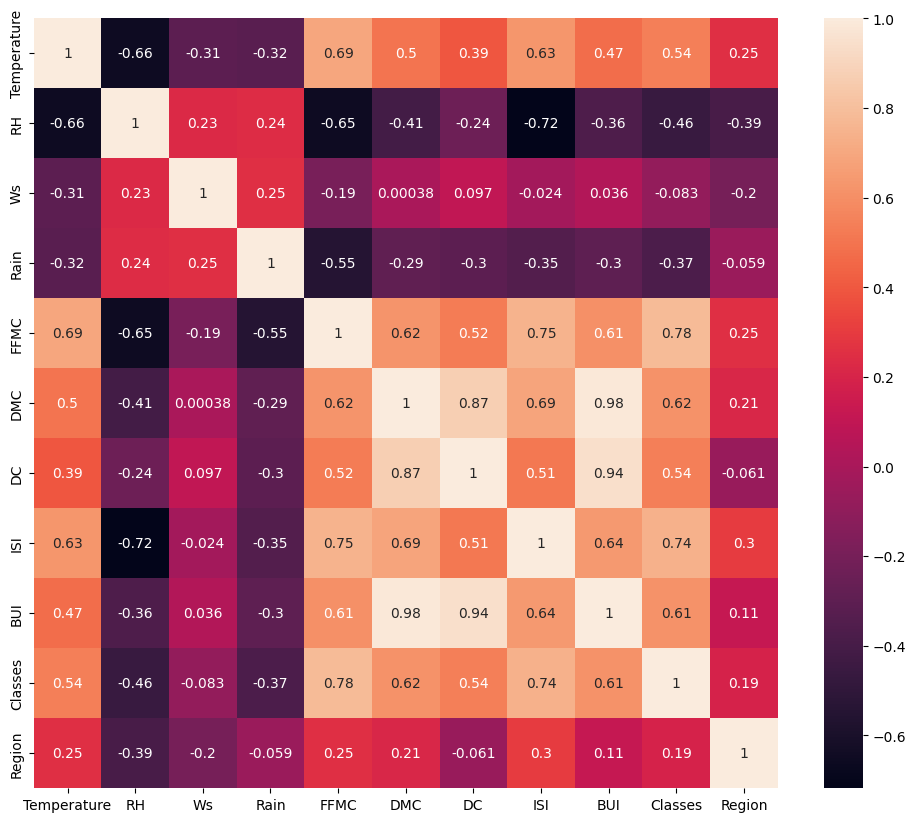

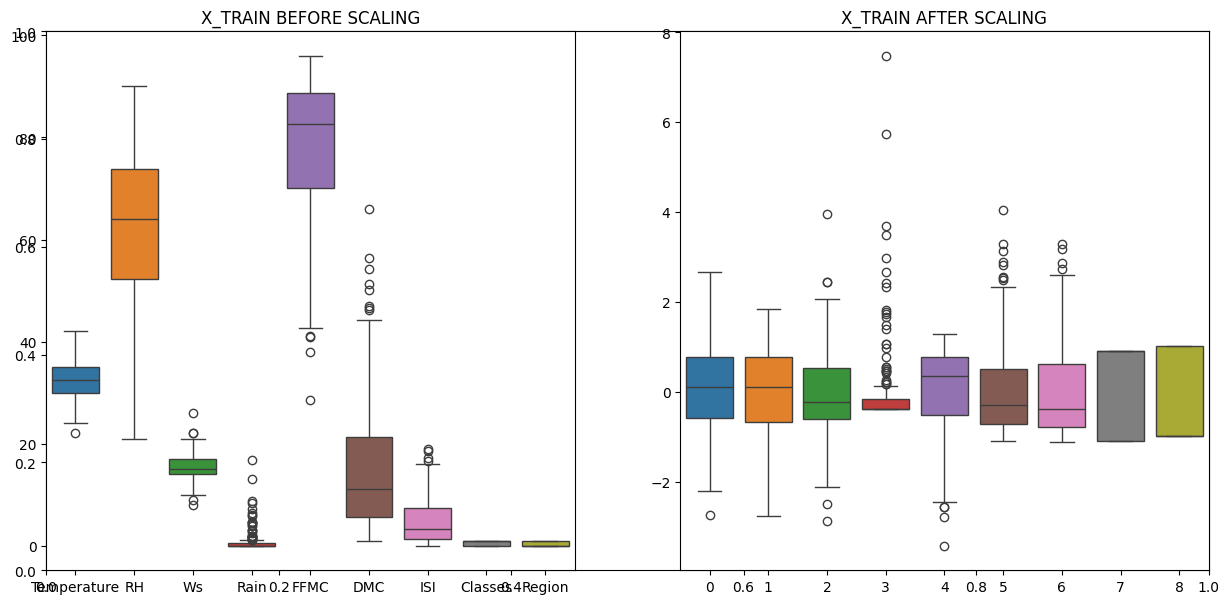

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("Algerian_forest_fires_cleaned_data.csv")
df.head()
df.columns
#Drop month day and year
df.drop(['day', 'month', 'year'],axis=1,inplace=True)
df.head()
df["Classes"].value_counts()
##Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)
df["Classes"].value_counts()
#Independent and Dependent features
x=df.drop("FWI",axis=1)
y=df["FWI"]
x.head()
y
#Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape
## Feature selection Based on Correleation
df.corr()
#Lets check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr, annot=True)
corr_mat=x_train.corr()
corr_mat.columns[0]
corr_mat=x_train.corr()

for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        print(f"Correlation between {corr_mat.columns[i]} and {corr_mat.columns[j]}: {abs(corr_mat.iloc[i, j])}")    
def correlation(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr            
#Thresh hold actually set by domain expert
correlation(x_train,0.85)
corr_features=correlation(x_train,0.85)
corr_features
#Drop features when correlation is more than 0.85 both in training and testing data
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape
#Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scale=scalar.fit_transform(x_train)
x_test_scale=scalar.transform(x_test)
x_train_scale
#Box plots to understand the effect of standard scaler
plt.subplots(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("X_TRAIN BEFORE SCALING")
plt.subplot(1,2,2)
sns.boxplot(x_train_scale)
plt.title("X_TRAIN AFTER SCALING")
plt.show()


Correlation between Temperature and Temperature: 1.0
Correlation between Temperature and RH: 0.6560952065209624
Correlation between Temperature and Ws: 0.30597667466611456
Correlation between Temperature and Rain: 0.31751247421836215
Correlation between Temperature and FFMC: 0.6947684187383468
Correlation between Temperature and DMC: 0.4981726049874546
Correlation between Temperature and DC: 0.3906835282526794
Correlation between Temperature and ISI: 0.6298481159429918
Correlation between Temperature and BUI: 0.4736093438255906
Correlation between Temperature and Classes: 0.5421411928126987
Correlation between Temperature and Region: 0.25454899588242585
Correlation between RH and Temperature: 0.6560952065209624
Correlation between RH and RH: 1.0
Correlation between RH and Ws: 0.22573610166999994
Correlation between RH and Rain: 0.24165583923276368
Correlation between RH and FFMC: 0.6530230237613415
Correlation between RH and DMC: 0.4146010743265655
Correlation between RH and DC: 0.2360

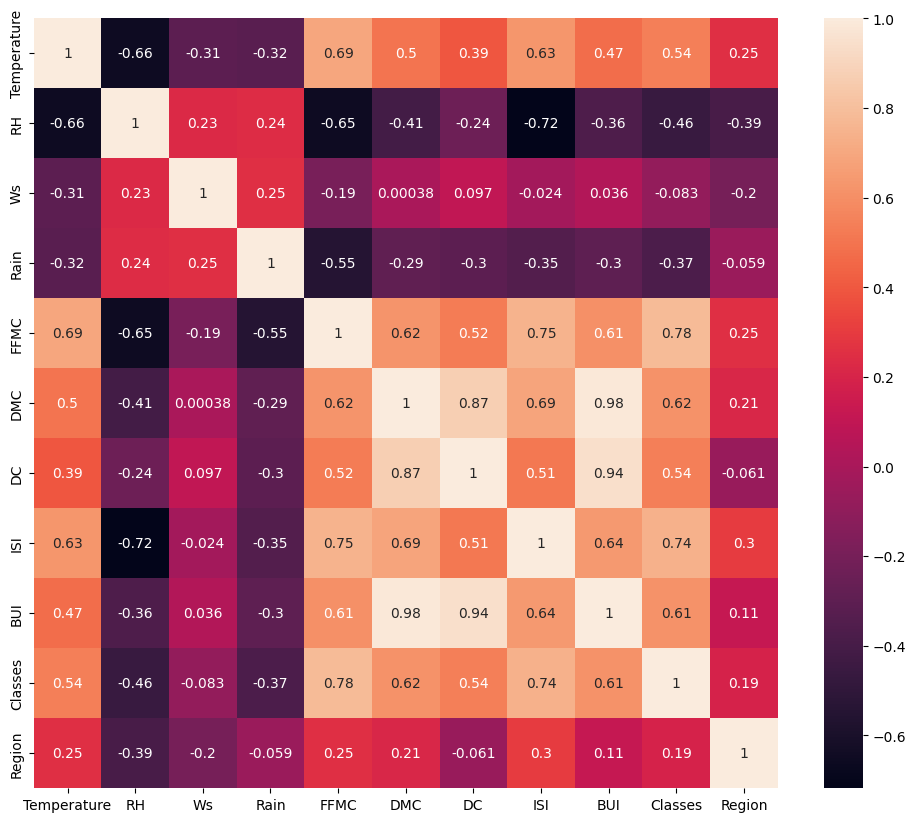

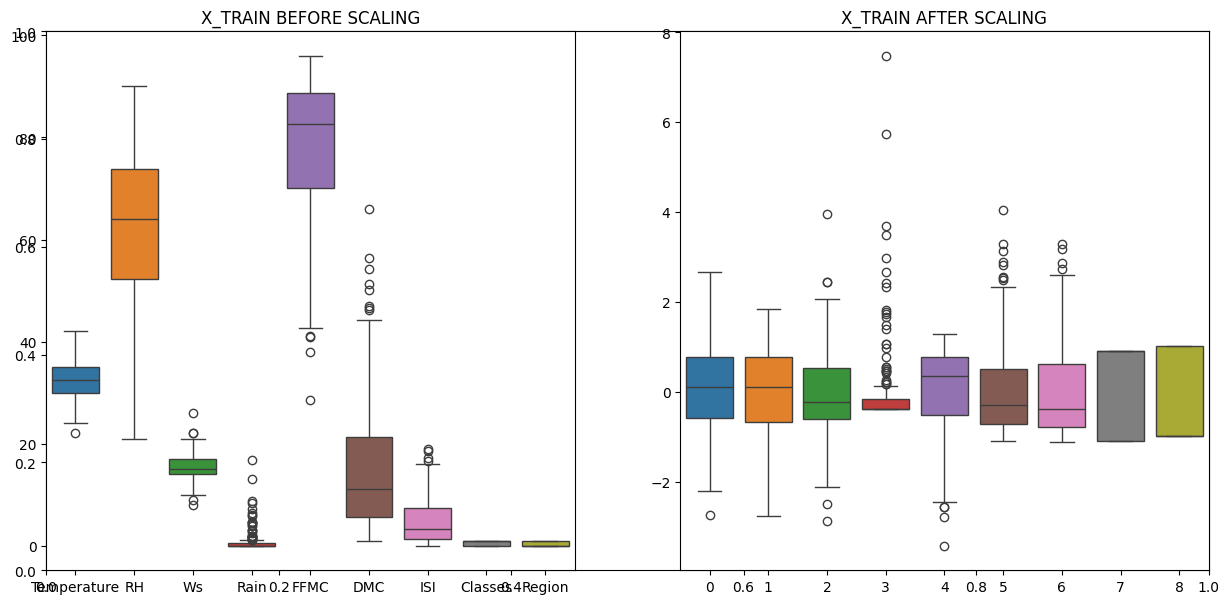

MSE: 0.674276687379158
MAE: 0.674276687379158
RMSE: 0.8211435242265253
R2 Score: 0.9847657384266951
MSE: 2.2483458918974772
MAE: 1.133175994914409
RMSE: 1.4994485292591664
0.9492020263112388
MSE: 5.5172511010252245
MAE: 1.8822353634896005
RMSE: 2.3488829474933874
0.8753460589519703


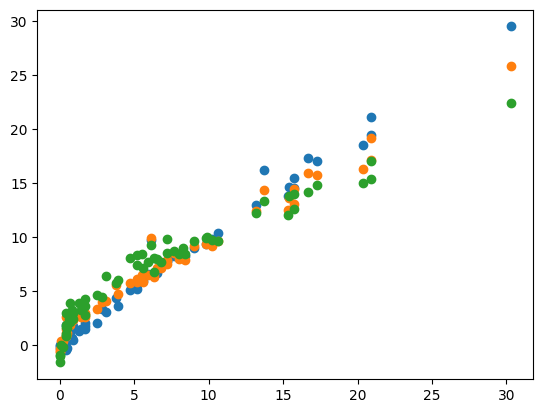

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("Algerian_forest_fires_cleaned_data.csv")
df.head()
df.columns
#Drop month day and year
df.drop(['day', 'month', 'year'],axis=1,inplace=True)
df.head()
df["Classes"].value_counts()
##Encoding 
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)
df["Classes"].value_counts()
#Independent and Dependent features
x=df.drop("FWI",axis=1)
y=df["FWI"]
x.head()
y
#Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape
## Feature selection Based on Correleation
df.corr()
#Lets check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr, annot=True)
corr_mat=x_train.corr()
corr_mat.columns[0]
corr_mat=x_train.corr()

for i in range(len(corr_mat.columns)):
    for j in range(len(corr_mat.columns)):
        print(f"Correlation between {corr_mat.columns[i]} and {corr_mat.columns[j]}: {abs(corr_mat.iloc[i, j])}")    
def correlation(dataset,threshold):
    col_corr=set()
    corr_mat=dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname=corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr            
#Thresh hold actually set by domain expert
correlation(x_train,0.85)
corr_features=correlation(x_train,0.85)
corr_features
#Drop features when correlation is more than 0.85 both in training and testing data
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape
#Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scale=scalar.fit_transform(x_train)
x_test_scale=scalar.transform(x_test)
x_train_scale
#Box plots to understand the effect of standard scaler
plt.subplots(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("X_TRAIN BEFORE SCALING")
plt.subplot(1,2,2)
sns.boxplot(x_train_scale)
plt.title("X_TRAIN AFTER SCALING")
plt.show()

#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lin_reg=LinearRegression(n_jobs=-1)
lin_reg.fit(x_train_scale,y_train)
y_pred=lin_reg.predict(x_test_scale)
mae=mean_squared_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2 Score:",r2_score)
#this showa the good model
plt.scatter(y_test,y_pred)
#Applying Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso=Lasso()
lasso.fit(x_train_scale,y_train)
y_pred=lasso.predict(x_test_scale)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print(score)
plt.scatter(y_test,y_pred)
#ElasticNet Regression 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic=ElasticNet()
elastic.fit(x_train_scale,y_train)
y_pred=elastic.predict(x_test_scale)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print(score)
plt.scatter(y_test,y_pred)


In [10]:
#Cross validation Using Lasso

In [11]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scale,y_train)

LassoCV(cv=5)

In [13]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [14]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

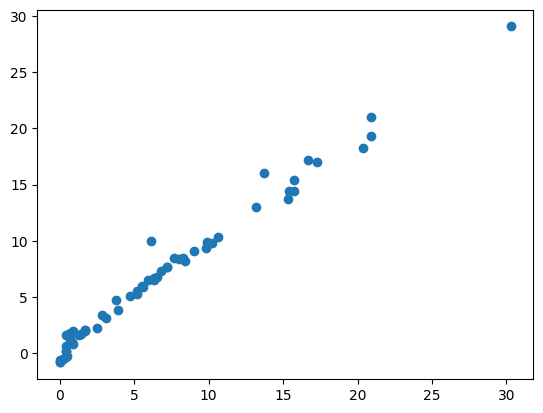

In [15]:
y_pred=lassocv.predict(x_test_scale)
plt.scatter(y_test,y_pred)

In [ ]:
#Cross validation using RidgeCv

MSE: 0.6949198918152096
MAE: 0.5642305340105715
RMSE: 0.8336185529456561
r2 score: 0.9842993364555512


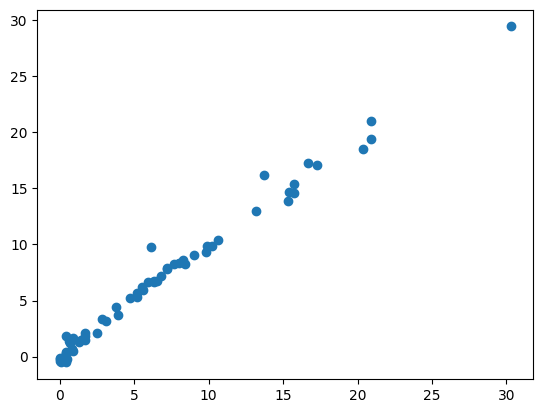

In [29]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scale,y_train)
y_pred=ridgecv.predict(x_test_scale)
plt.scatter(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("r2 score:",score)

In [30]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [31]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [32]:
#Cross validation using elastic net

MSE: 0.8222830416276258
MAE: 0.6575946731430898
RMSE: 0.906798236449336
r2 score: 0.9814217587854941


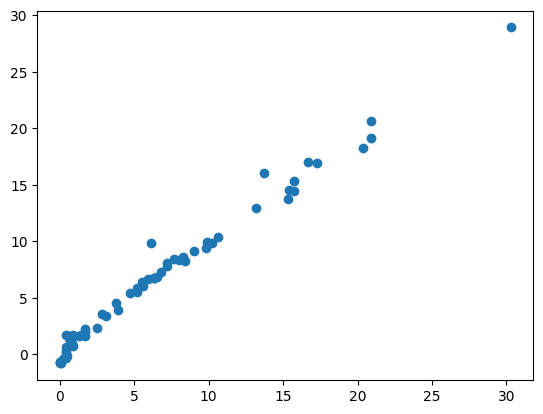

In [34]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scale,y_train)
y_pred=elasticcv.predict(x_test_scale)
plt.scatter(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("r2 score:",score)